# Learning Objectives
- [Example1: A Step-by-Step Illustration of Density-based Clustering Algorithm (DBSCAN)](#Example1:-A-Step-by-Step-Illustration-of-K-means-Clustering)
  - [Step1: Create Example Dataset](#Step1:-Create-Example-Dataset)
  - [Step2: DBSCAN](#Step2:-DBSCAN)
- [Example2: Quantifying the quality of clustering via Silhouette plots](#Example2:-Quantifying-the-quality-of-clustering-via-Silhouette-plots)
  - [Step1: Clustering Algorithms: K-means, Hierarchical Clustering, DBSCAN](#Step1:-Clustering-Algorithms:-K-means,-Hierarchical-Clustering,-DBSCAN)
  - [Step2: Clustering Quality via Silhouette Coefficients](#Step2:-Clustering-Quality-via-Silhouette-Coefficients)

#### Adapted from 
* Python Data Science Handbook by Jake VanderPlas
* Code Repository: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb
* Python Machine Learning 3rd Edition by Sebastian Raschka, Packt Publishing Ltd. 2019
* Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition



# Example1: A Step-by-Step Illustration of Density-based Clustering Algorithm (DBSCAN)

### Step1: Create Example Dataset

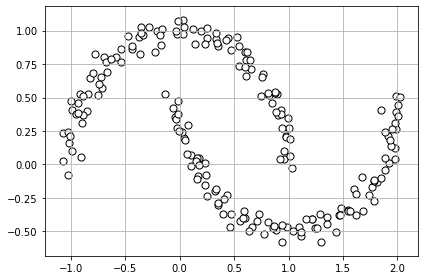

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)


plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

### Step2: DBSCAN

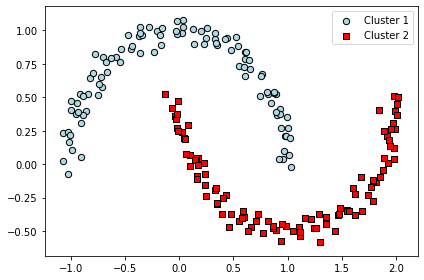

In [5]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

# Example2: Quantifying the quality of clustering via Silhouette plots

### Step1: Clustering Algorithms: K-means, Hierarchical Clustering, DBSCAN

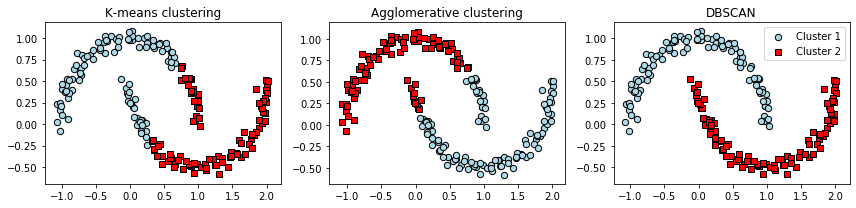

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3))

from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')



from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax2.set_title('Agglomerative clustering')




db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)

ax3.scatter(X[y_db == 0, 0], X[y_db == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='Cluster 1')
ax3.scatter(X[y_db == 1, 0], X[y_db == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='Cluster 2')
ax3.set_title('DBSCAN')



plt.legend()
plt.tight_layout()
plt.show()

### Step2: Clustering Quality via Silhouette Coefficients

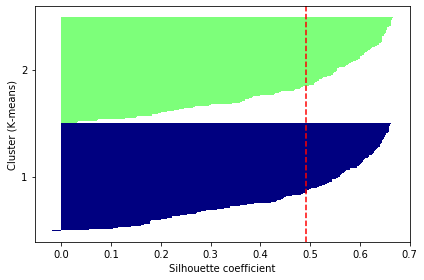

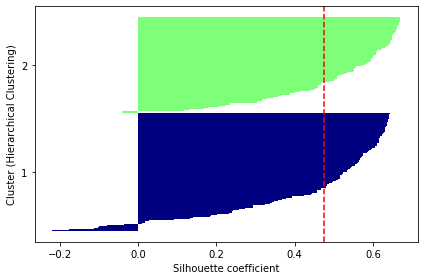

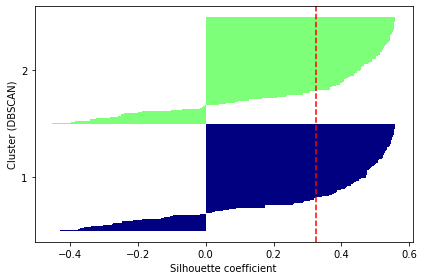

In [17]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster (K-means)')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()





cluster_labels = np.unique(y_ac)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_ac, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_ac == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster (Hierarchical Clustering)')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()




cluster_labels = np.unique(y_db)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_db, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_db == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster (DBSCAN)')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()